In [1]:
import matplotlib.pyplot as plt
# from matplotlib.animation import ArtistAnimation
import numpy as np
import torch
from torch import nn

In [44]:
# VARIABLES

# Range
min = -torch.pi
max = torch.pi

# Params
steps = 10000
batch_size = 100
log_every_steps = 1000

# Learning rate
learning_rate = 1e-2

# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

# Classes and methods
rates = []

In [45]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_sig_stack = nn.Sequential(
            nn.Linear(1, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 1),
        )

    def forward(self, x):
        output = self.linear_sig_stack(x)
        return output

In [46]:
def train(
    model: NeuralNetwork,
    optimizer: torch.optim.Optimizer,
    steps: int,
    batch_size: int,
    device: str,
    min: float,
    max: float,
):
    # Animation
    # num_points = 250
    # points = torch.linspace(-torch.pi, torch.pi, 250, device=device).unsqueeze(-1)
    # y_plt = torch.sin(points)

    # fig, ax = plt.subplots()

    # ax.plot(points.cpu().numpy(), y_plt.cpu().numpy(), color='blue')

    # ims = []

    for i in range(steps):
        # Generate batch of `batch_size` inputs.
        x = torch.rand([batch_size, 1], device=device) * 2 * torch.pi - torch.pi
        y_expected = torch.sin(x)
        y_hat = model(x)

        loss = nn.functional.l1_loss(y_expected, y_hat)

        # Backwards
        model.zero_grad()
        loss.backward()

        # Optimizer var updates
        optimizer.step()

        # Log every n batches
        if i > 0 and i % log_every_steps == 0:
            print(f"batch: {i}, loss: {loss.item()}")
            rates.append(loss.item())
            # with torch.no_grad():
            #     model.eval()
            #     y_hat_plt = model(points)
            #     im = ax.plot(points.cpu().numpy(), y_hat_plt.cpu().numpy(), color='red')
            #     ims.append(im)

    # anim = ArtistAnimation(fig, ims, interval=500)
    # anim.save('mod.mp4')
    # save model params
    # torch.save(model.state_dict(),"model.torch")

In [47]:
# Neural network model
model = NeuralNetwork().to(device)
# model.load_state_dict('file.file')

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Training
train(
    model=model,
    optimizer=optimizer,
    steps=steps,
    batch_size=batch_size,
    device=device,
    min=min,
    max=max,
)

batch: 1000, loss: 0.18951758742332458
batch: 2000, loss: 0.164041206240654
batch: 3000, loss: 0.09989462792873383
batch: 4000, loss: 0.06869283318519592
batch: 5000, loss: 0.04272771254181862
batch: 6000, loss: 0.06486826390028
batch: 7000, loss: 0.022828392684459686
batch: 8000, loss: 0.03559761121869087
batch: 9000, loss: 0.026311973109841347


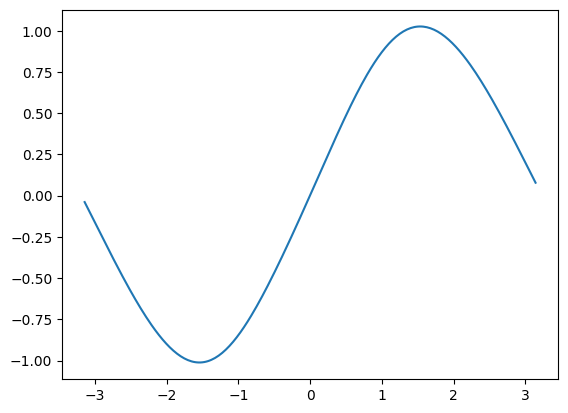

In [48]:
# Draw the prediction performance within trained range.
with torch.no_grad():
    model.eval()
    num_points = 250
    points = torch.linspace(-torch.pi, torch.pi, 250, device=device).unsqueeze(-1)
    y = model(points)
plt.plot(points.cpu().numpy(), y.cpu().numpy())

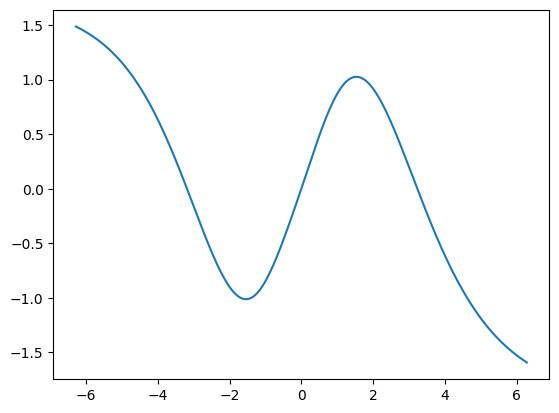

In [49]:
# Draw prediction beyond the range. Notice how it does not generalize to the data
# it has not seen before.
with torch.no_grad():
    model.eval()
    num_points = 250
    points = torch.linspace(-2 * torch.pi, 2 * torch.pi, 250, device=device).unsqueeze(-1)
    y = model(points)
plt.plot(points.cpu().numpy(), y.cpu().numpy())